1. Veri Seti Hazırlığı

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/new_retail_data.csv")

2. Keşifsel Veri Analizi (EDA)

In [3]:
def check_df(dataframe, head=5):
    print("##################### Shape #####################")
    print(dataframe.shape)
    print("##################### Types #####################")
    print(dataframe.dtypes)
    print("##################### Head #####################")
    print(dataframe.head(5))
    print("##################### NA #####################")
    print(dataframe.isnull().sum())

In [4]:
check_df(df)

##################### Shape #####################
(302010, 30)
##################### Types #####################
Transaction_ID      float64
Customer_ID         float64
Name                 object
Email                object
Phone               float64
Address              object
City                 object
State                object
Zipcode             float64
Country              object
Age                 float64
Gender               object
Income               object
Customer_Segment     object
Date                 object
Year                float64
Month                object
Time                 object
Total_Purchases     float64
Amount              float64
Total_Amount        float64
Product_Category     object
Product_Brand        object
Product_Type         object
Feedback             object
Shipping_Method      object
Payment_Method       object
Order_Status         object
Ratings             float64
products             object
dtype: object
##################### Head ######

In [5]:
df.value_counts("Product_Category")

,count
Product_Category,
Electronics,71196
Grocery,66786
Clothing,54741
Books,54622
Home Decor,54382


In [6]:
df = df.dropna(subset=["Product_Category"])

/tmp/ipython-input-7-3532471079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


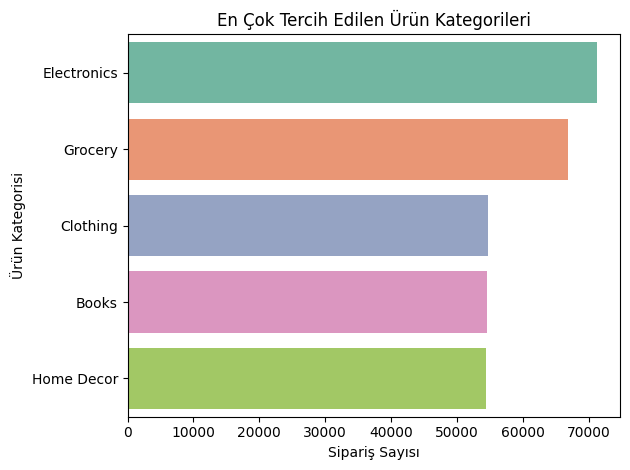

In [7]:
plt.figure()
sns.countplot(
    data=df,
    y="Product_Category",
    order=df["Product_Category"].value_counts().index,
    palette="Set2"
)
plt.title("En Çok Tercih Edilen Ürün Kategorileri")
plt.xlabel("Sipariş Sayısı")
plt.ylabel("Ürün Kategorisi")
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-27905916.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_types.values, y=top_types.index, palette="viridis")


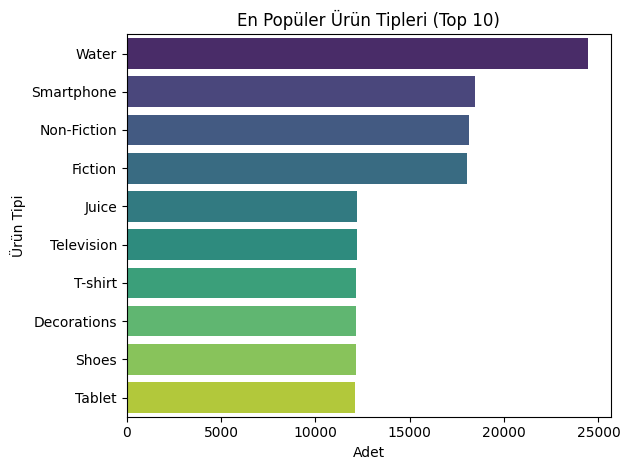

In [11]:
top_types = df["Product_Type"].value_counts().head(10)
sns.barplot(x=top_types.values, y=top_types.index, palette="viridis")
plt.title("En Popüler Ürün Tipleri (Top 10)")
plt.xlabel("Adet")
plt.ylabel("Ürün Tipi")
plt.tight_layout()
plt.show()

/tmp/ipython-input-14-3845809128.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=types.values, y=types.index, palette="cubehelix")


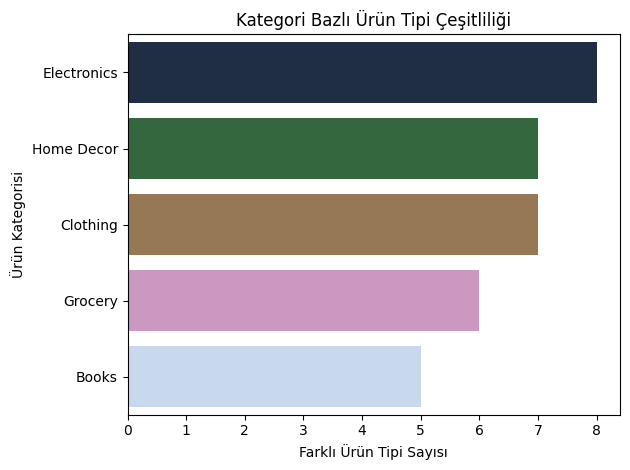

In [14]:
types = df.groupby("Product_Category")["Product_Type"].nunique().sort_values(ascending=False)
sns.barplot(x=types.values, y=types.index, palette="cubehelix")
plt.title("Kategori Bazlı Ürün Tipi Çeşitliliği")
plt.xlabel("Farklı Ürün Tipi Sayısı")
plt.ylabel("Ürün Kategorisi")
plt.tight_layout()
plt.show()

3. Başlıktan Açıklama Üretimi (GenAI)

In [16]:
from transformers import pipeline

In [ ]:
!pip install transformers sentencepiece pandas --quiet
!pip install -q transformers accelerate sentencepiece

In [17]:
gen = pipeline(
    "text2text-generation",
    model="google/flan-t5-large",
    device_map="auto",
    max_length=80,
    do_sample=True,
    top_p=0.95,
    temperature=0.9,
    repetition_penalty=1.2
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json: 0.00B [00:00, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json: 0.00B [00:00, ?B/s]

Device set to use cpu


In [18]:
# İlk 10 başlığı alalım.
titles = df["products"].head(10).tolist()

prompt = (
    "Write a vivid, engaging e-commerce product description. Avoid repeating words or phrases."
    "Highlight key features, customer benefits and a friendly call-to-action.\n"
    "products: \"{title}\""
)

inputs  = [prompt.format(title=t) for t in titles]
outputs = gen(inputs)

In [19]:
# Karşılaştırma tablosu
pd.set_option("display.max_colwidth", None)
results = []
for title, out, idx in zip(titles, outputs, range(len(titles))):
    results.append({
        "Başlık": title,
        "Model Açıklaması": out["generated_text"].strip()
    })
results_df = pd.DataFrame(results)
results_df

,Başlık,Model Açıklaması
0,Cycling shorts,Cycling shorts are a great way to stay warm on a cold winter day.
1,Lenovo Tab,"The Lenovo Tab is a low-cost, high-performance tablet computer. It features a 10.1-inch QHD display, a 1366 x 768 pixel resolution, and a 256 GB hard drive."
2,Sports equipment,"The following products are in the category ""Sports equipment""."
3,Utility knife,The Utility Knife is a utility knife with a blade length of 9 inches.
4,Chocolate cookies,Chocolate cookies are a popular choice for people looking for a sweet treat. They come in a variety of flavors and can be eaten by themselves or with a cup of coffee.
5,Lenovo Tab,Lenovo Tab is a tablet computer with a 10.1-inch screen and a 256 GB hard drive.
6,QLED TV,QLED TV is a high-resolution LED TV with a wide color gamut. It has a built-in Wi-Fi and a remote control.
7,Dress shirt,The Dress Shirt is a dress shirt with a collar. It is made of 100% cotton and has a button down collar. It is available in a variety of colors.
8,Dark chocolate,Dark chocolate is a popular choice for people who like to eat dark chocolate. It's also a good choice for people who like to drink dark chocolate. Dark chocolate is also a popular choice for people who like to eat dark chocolate. Dark chocolate is also a good choice for people who like to eat dark chocolate.
9,Candles,Candles are a great way to decorate your home or office. They come in a variety of colors and styles and are available in a variety of sizes.


4. Kategori Tahmini (Gözetimli Öğrenme)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report

In [21]:
X = df["products"]
y = df["Product_Category"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

In [25]:
# TF-IDF vektörleştirme
tfidf = TfidfVectorizer(max_features=5000, stop_words="english")
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)

In [26]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

In [27]:
model.fit(X_train_vec, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test_vec)

In [29]:
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

In [30]:
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")

Accuracy: 0.9980
F1 Score (weighted): 0.9980


In [31]:
# classification_report
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Classification Report:

              precision    recall  f1-score   support

       Books       1.00      1.00      1.00     10925
    Clothing       1.00      1.00      1.00     10948
 Electronics       0.99      1.00      1.00     14239
     Grocery       1.00      1.00      1.00     13357
  Home Decor       1.00      0.99      0.99     10877

    accuracy                           1.00     60346
   macro avg       1.00      1.00      1.00     60346
weighted avg       1.00      1.00      1.00     60346



In [32]:
# Test setinden rastgele örnekler seçip kontrol edelim.

import random

n_ornek = 10
indices = random.sample(range(len(X_test)), n_ornek)

print(f"{'ÜRÜN BAŞLIĞI':<50} | {'GERÇEK KATEGORİ':<15} | {'TAHMİN EDİLEN KATEGORİ'}")
print("-"*100)
for idx in indices:
    baslik = X_test.iloc[idx]
    gercek = y_test.iloc[idx]
    tahmin = model.predict(X_test_vec[idx])[0]
    print(f"{baslik[:50]:<50} | {gercek:<15} | {tahmin}")


ÜRÜN BAŞLIĞI                                       | GERÇEK KATEGORİ | TAHMİN EDİLEN KATEGORİ
----------------------------------------------------------------------------------------------------
Curved TV                                          | Electronics     | Electronics
Crop top                                           | Clothing        | Clothing
Sink                                               | Home Decor      | Home Decor
Business                                           | Books           | Books
Science                                            | Books           | Books
Business                                           | Books           | Books
Sports equipment                                   | Books           | Books
Over-ear headphones                                | Electronics     | Electronics
Mini fridge                                        | Electronics     | Electronics
Health                                             | Books           | Books


In [33]:
# Yeni bir ürün başlığı
yeni_urun = ["Apple MacBook Pro"]

# Yeni ürünü TF-IDF formatına dönüştür
yeni_urun_vec = tfidf.transform(yeni_urun)

# Kategoriyi tahmin et
tahmin_edilen_kategori = model.predict(yeni_urun_vec)[0]

print(f"Ürün: {yeni_urun[0]}")
print(f"Tahmin edilen kategori: {tahmin_edilen_kategori}")


Ürün: Apple MacBook Pro
Tahmin edilen kategori: Electronics


In [34]:
# Yeni bir ürün başlığı
yeni_urun = ["coca cola"]

# Yeni ürünü TF-IDF formatına dönüştür
yeni_urun_vec = tfidf.transform(yeni_urun)

# Kategoriyi tahmin et
tahmin_edilen_kategori = model.predict(yeni_urun_vec)[0]

print(f"Ürün: {yeni_urun[0]}")
print(f"Tahmin edilen kategori: {tahmin_edilen_kategori}")

Ürün: coca cola
Tahmin edilen kategori: Grocery
